<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/Week_4_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-4: Part-1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## Sampling

Sampling from a distribution is an important skill. While learning ML, it is often a good idea to work with toy-datasets. These toy-datasets can be generated from well known distributions such as the Bernoulli and Gaussian. The next section will introduce the idea of sampling in NumPy.

### Random number generator

We can sample from distributions with the help of a random number generator:

In [3]:
rng = np.random.default_rng()

We will start by generating a dataset of ones and zeros. The following code generates a sample of size $10$.

In [4]:
rng = np.random.default_rng(seed = 1001)  #the same number can be generated every time. The seed value can be any integer 
X = rng.integers(0, 2, size = 10)
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Notice that we have used a seed value as an argument to the random number generator. This is meant to ensure reproducability. That is, no matter how many times this cell is run, we will get the same sequence of random numbers. First run the cell a few times to verify that this is true. Now, run the cell with a different seed value and see what happens.

## Problem-1

For the dataset `X` given below, what is the maximum likelihood estimate of the mean if we use a Bernoulli distribution with parameter $p$ to model this data? Perform all your operations in the cell given below. Do not change the seed value. Enter your answer correct to three decimal places.

In [5]:
### Data ###
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 1000)
### Solution ###
p_hat = X.mean()
p_hat

0.506

What happens if we increase the size of the dataset to $10000$? We see that `np.integers` is only giving us observations from a discrete uniform distribution. In other words, if you think about it as a coin toss, the coin is unbiased. How do we generate samples from a biased coin or a Bernoulli distribution with $p \neq 0.5$? We use a method called `choice`. This method "chooses" numbers from a list or an array based on the probabilities given to it in the array `p`.

In [6]:
rng = np.random.default_rng(seed = 1001)
X = rng.choice([0, 1], size = 20, p = [0.2, 0.8])
X

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1])

Note that the array `p` specifies the probabilities of $0$ and $1$.

## Problem-2

Sample $1000$ points from a  Bernoulli distribution whose parameter is $p = 0.7$. Compute the maximum likelihood estimate of the parameter given this sample. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

**Note**:

- The parameter $p$ of a Bernoulli distribution always points to $P(x = 1)$.

- It may seem pointless to compute the MLE when the parameter is already known to us. But this is a good exercise to verify our understanding of concepts with such toy-datasets.

In [7]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([0, 1], size = 1000, p = [0.3, 0.7])
print(np.sum(X)/1000)

0.707


## Problem-3

Plot a bar graph of the above sample. You can use the `plt.bar` method. To know more about a method in Google Colab type `plt.bar?` in a cell and run it.

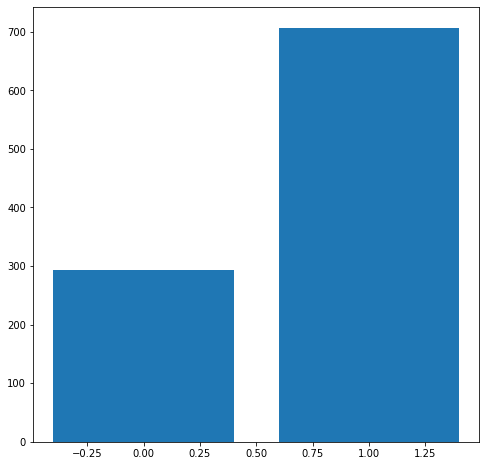

In [9]:
### Solution ###
one_num = X.sum()
zero_num = X.shape[0] - one_num
plt.bar([0,1],[zero_num,one_num])
plt.show()

## Problem-4

What is the impact of the size of the dataset on the MLE? Generate datasets of the following sizes:

- $n = 10$
- $n = 100$
- $n = 1000$
- $n = 10000$
- $n = 100000$
- $n = 1000000$

Sample each dataset from a Bernoulli distribution with parameter $p = 0.2$. For each dataset, first compute the MLE and then compute the difference (abs value) between the MLE and the true parameter. That is, compute the value $d$ for different values of $n$

$$
d(n) = |\hat{p}_{ML} - p|
$$

Plot $d(n)$ with respect to $n$. What do you osbserve?


[0.2, 0.5900000000000001, 0.6199999999999999, 0.5995999999999999, 0.5989500000000001, 0.5985929999999999]


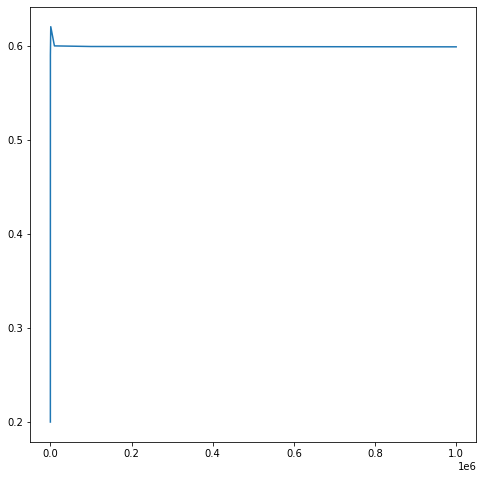

In [18]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
n = [10,100,1000,10000,100000,1000000]

p = 0.2
d = []

for i in n:
  X = rng.choice([0, 1], size = i, p = [0.2, 0.8])
  p_ML = np.mean(X)
  dist = abs(p_ML - p)
  d.append(dist)
print(d)
plt.plot(n,d)
plt.show()

## Problem-5

Sample $1000$ points from a six sided, biased die with faces: $1, 2, 3, 4, 5, 6$. The parameters corresponding to the six faces are:

$$
[0.1, 0.2, 0.3, 0.3, 0.05, 0.05]
$$

Note that this is a categorical distribution. Refer to the practice assignment for a similar problem. Find the maximum likelihood estimate of the parameter $p_3$ (corresponds to the third face). Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

In [23]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
X = rng.choice([1,2,3,4,5,6], size = 1000, p = [0.1,0.2,0.3,0.3,0.05,0.05])

#A good estimate for p3 will be sample proportion 
count_of_3  = np.sum([1 if i == 3 else 0 for i in X])
p3 = count_of_3/len(X)
print(p3)

0.319


## Problem-6

Plot the bar graph for the above sample.

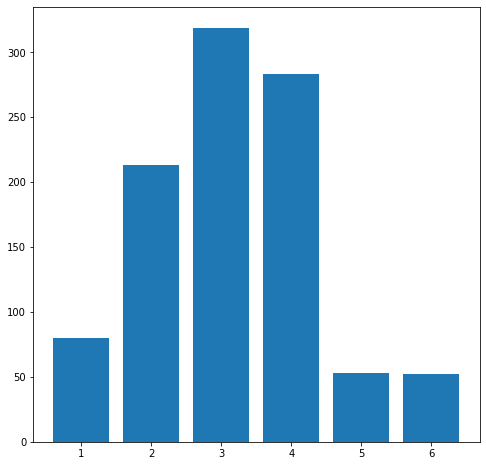

In [26]:
## Solution ##
def count(n,X):
  return np.sum([1 if i == n else 0 for i in X])

plt.bar([1,2,3,4,5,6],[count(j,X) for j in [1,2,3,4,5,6]])
plt.show()

We now move to the Gaussian distribution. First, we shall get used to computing the density of a Gaussian given its mean and variance.

## Problem-7

Consider the following Gaussian distribution:

$$
\mathcal{N}(3, 1.5^2)
$$

Compute the density of the point $5$ with respect to this distribution. Enter your answer correct to three decimal places.

In [30]:
## Solution ##
def gaussian_pdf(x,mu,sigma):
  num = np.exp((-(x-mu)**2)/(2*sigma**2))
  dino = np.sqrt(2*np.pi)*sigma
  return num/dino
print(gaussian_pdf(5,3,1.5))

0.10934004978399575


Now, we shall move to sampling from a Gaussian distribution.

## Problem-8

Generate a dataset of $1000$ points from a Gaussian distribution with mean $3$ and standard deviation $1.5$. Find the maximum likelihood estimate of the mean for this dataset. Enter your answer correct to three decimal places. Use the cell given below for all your computations. You can search for the method to use from the NumPy docs. It is quite similar to what we did for the case of the Bernoulli and categorical distributions.

In [32]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
s = np.random.normal(3, 1.5, 1000)
print(np.mean(s))

2.9421232724037956


## Problem-9

Plot the histogram of the dataset given above. Use the `plt.hist` method.

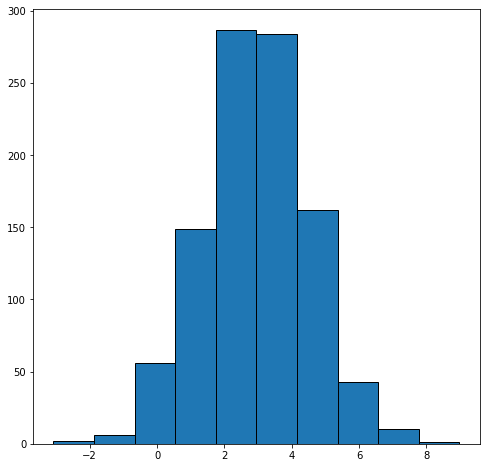

In [40]:
## Solution ##
plt.hist(s,bins=10, ec="black")
plt.show() #We can also put a ; after above line

We will now turn to understanding the shapes of the Beta distribution for different values of parameters $\alpha$ and $\beta$.

## Problem-10

Plot the beta distribution for the following values:

- $\alpha = 5, \beta = 5$
- $\alpha = 5, \beta = 1.5$
- $\alpha = 1.5, \beta = 5$
- $\alpha = 0.5, \beta = 0.5$


Do not worry about the normalization constant. Use `plt.subplot(2, 2, i)` to plot all four distributions in a single figure. `i` should take the values 1, 2, 3 and 4 for these four subplots. If you are not sure how it works, google it. Stackoverflow will be of great help here.

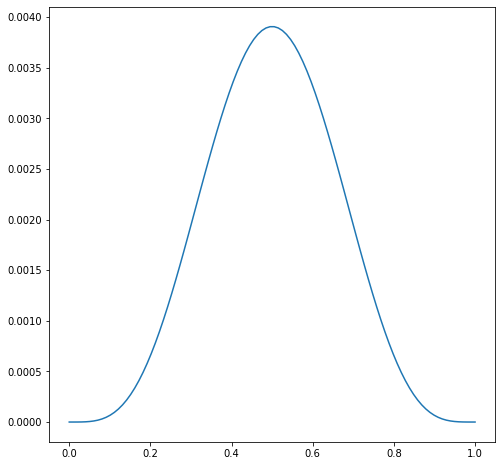

In [46]:
def beta_exp(x,alpha,beta):
  return x**(alpha-1)*(1-x)**(beta-1)

x = np.linspace(0,1,100)

plt.plot(x,beta_exp(x,5,5))
plt.show()